In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
from torchvision import models, transforms

In [56]:
num_classes = 21
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** num_classes - 1])
colors = torch.as_tensor([i for i in range(num_classes)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")


def decode_segmap(input_image, output_preds):
    r = Image.fromarray(output_preds).resize(input_image.size)
    r.putpalette(colors)
    
    return r


def segment(model, path, show_orig=True):
    plt.figure(figsize=(20,10))
    img = Image.open(path)
    if show_orig: 
        plt.subplot(1,2,1)
        plt.imshow(img); plt.axis('off')

    preprocess = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])

    inp = preprocess(img).unsqueeze(0)
    out = model(inp)['out'][0]
    output_preds = out.argmax(0).byte().cpu().numpy()
    rgb = decode_segmap(img, output_preds)
    plt.subplot(1,2,2)
    plt.imshow(rgb); plt.axis('off')

### Pretrained Fully Connected Resnet

In [15]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [58]:
!wget -nv https://dougboy.smugmug.com/Automotive/Jacksons-G35/DSC0638/1032644974_HxHhY-O.jpg -O images/cars.jpg

2021-05-04 10:57:42 URL:https://dougboy.smugmug.com/Automotive/Jacksons-G35/DSC0638/1032644974_HxHhY-O.jpg [511788/511788] -> "cars.jpg" [1]


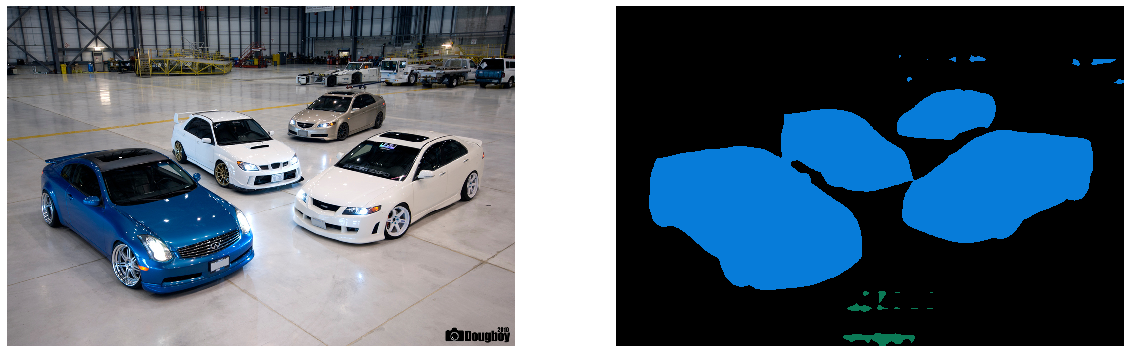

In [62]:
segment(fcn, './images/cars.jpg')

In [43]:
!wget -nv https://horsej-intellectsolutio.netdna-ssl.com/cdn/farfuture/DIFI9W2JKioiUVCSlPMOvJpFg6XeVt35VlzbFcd8umI/mtime:1543626954/files/styles/article_large/public/pictures-videos/articles/canstockphoto24623274_-_callipso88-web.jpg -O images/dog_and_horse.jpg

2021-05-04 10:49:10 URL:https://horsej-intellectsolutio.netdna-ssl.com/cdn/farfuture/DIFI9W2JKioiUVCSlPMOvJpFg6XeVt35VlzbFcd8umI/mtime:1543626954/files/styles/article_large/public/pictures-videos/articles/canstockphoto24623274_-_callipso88-web.jpg [46429/46429] -> "dog_and_horse.jpg" [1]


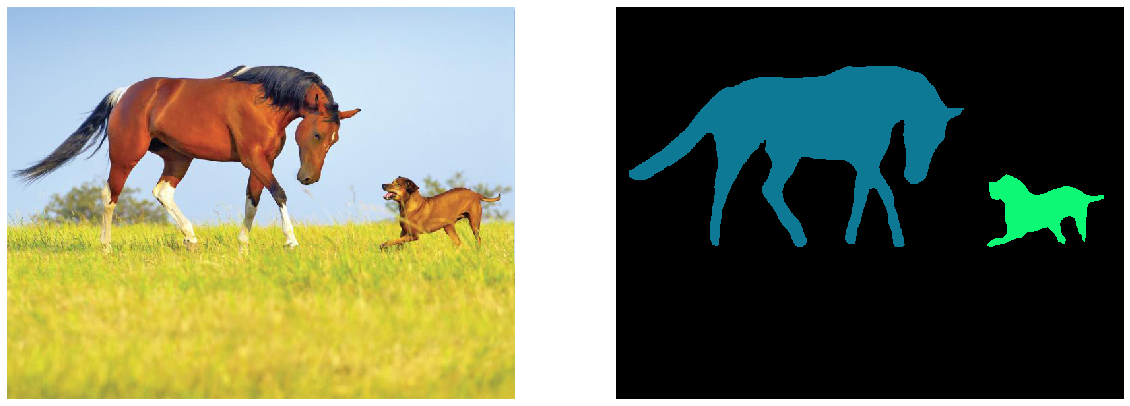

In [61]:
segment(fcn, './images/dog_and_horse.jpg')